FINAL PROJECT - LAKSHAY GIRDHER(A00297517)

Predicting Profitability of Retail Orders Using Supervised Machine Learning
U.S SUPERSTORE DATASET ANALYSIS

In [ ]:
# First of all we will upload some  libraries that we need for our project
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


My Goal is to use supervised learning to predict whether an order will be profitable or not, based on features like Category, Discount, Region, Segment, and Sales

PROBLEM DEFINATION

"Can we predict whether a future order will be profitable based on its attributes?"

In [ ]:
# loaded the dataset and read it
df = "/content/Sample - Superstore.csv"
df = pd.read_csv(df, encoding='ISO-8859-1')


# Exploring the data

In [ ]:
# first of all we will check some rows and columns for understanding the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#dropping irrelevant columns
df.drop(columns=[
    'Row ID', 'Customer ID', 'Customer Name', 'Order ID',
    'Product ID', 'Order Date', 'Ship Date',
    'Postal Code', 'Product Name', 'Country'
], inplace=True, errors='ignore')

df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# check the shape of the data and columns
print(df.shape)

df.columns

(9994, 11)


Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# In info() we will get to know the data type of each feature and the null values
# As we are not having any null values so we don't need to use isnull() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


# VISUALS ( HISTOGRAM AND BOX PLOT)

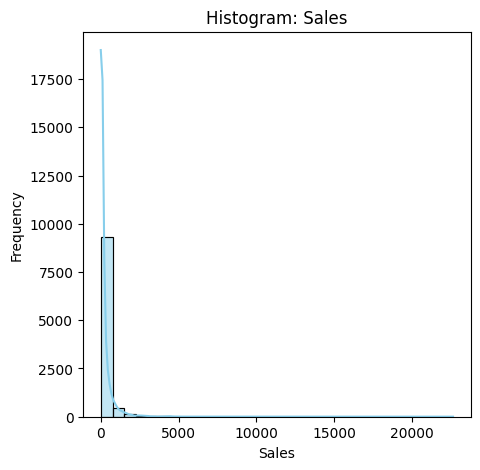

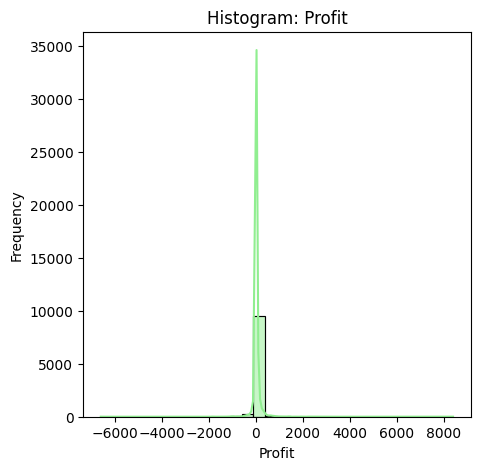

In [ ]:
# plotted histogram for Sales and Profit column to get better understading of the data

plt.figure(figsize=(5, 5))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title("Histogram: Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# sales data is skewed

#Most values are small, with a few extreme ones

plt.figure(figsize=(5, 5))
sns.histplot(df['Profit'], bins=30, kde=True, color='lightgreen')
plt.title("Histogram: Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

#Most orders generate very small profit (close to 0)


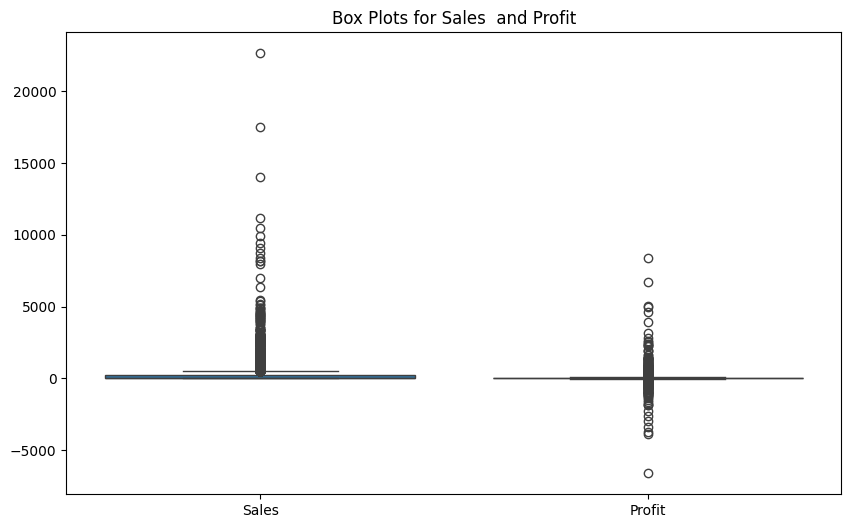

In [ ]:
# Boxplot for Sales and Profit before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales', 'Profit']])
plt.title("Box Plots for Sales  and Profit")
plt.show()

# In this  boxplot of sales and profit  we  have couple  of outlliers

# Identifying outliers and removing them

In [ ]:

# created a function to find outliers and calculate the IQR , lower_bound , upper_bound
def find_iqr_bounds(data, feature, multiplier=1.5):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

    # Calculate IQR bounds for sales and profit
sales_lower, sales_upper = find_iqr_bounds(df, "Sales", multiplier=1.5)
profit_lower, profit_upper = find_iqr_bounds(df, "Profit", multiplier=1.5)

# Created a new variable df_store in which i removed the outlliers
df_store = df[
    (df["Sales"] >= sales_lower) & (df["Sales"] <= sales_upper) &
    (df["Profit"] >= profit_lower) & (df["Profit"] <= profit_upper)
].copy()

print(f"Original dataset size: {df.shape}")
print(f"After outlier removal: {df_store.shape}")



Original dataset size: (9994, 11)
After outlier removal: (7874, 11)


# Data Preprocessing


In [ ]:
# In this I have encoded the columns for ordinal data i used map function
# and for  non ordinal data i used get_dummies function


# Map 'Segment': Consumer = 0, Corporate = 1, Home Office = 2
df_store['Segment'] = df_store['Segment'].map({'Consumer': 0, 'Corporate': 1, 'Home Office': 2})

# Then apply get_dummies for Region, Category, Sub-Category
df_store = pd.get_dummies(df_store, columns=['Region', 'Category', 'Sub-Category'], drop_first=True)


df_store.head()


,Ship Mode,Segment,City,State,Sales,Quantity,Discount,Profit,Region_East,Region_South,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,Second Class,0,Henderson,Kentucky,261.960,2,0.0,41.9136,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Second Class,1,Los Angeles,California,14.620,2,0.0,6.8714,False,False,...,False,False,False,True,False,False,False,False,False,False
4,Standard Class,0,Fort Lauderdale,Florida,22.368,2,0.2,2.5164,False,True,...,False,False,False,False,False,False,False,True,False,False
5,Standard Class,0,Los Angeles,California,48.860,7,0.0,14.1694,False,False,...,False,False,True,False,False,False,False,False,False,False
6,Standard Class,0,Los Angeles,California,7.280,4,0.0,1.9656,False,False,...,False,False,False,False,False,False,False,False,False,False


# Target Variable and training the data

In [ ]:
#Created a Target Column as we are calculating logistic regression and decision tree
df_store['Profitable'] = (df_store['Profit'] > 0).astype(int)
print(df_store.columns)

Index(['Ship Mode', 'Segment', 'City', 'State', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Region_East', 'Region_South', 'Region_West',
       'Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Profitable'],
      dtype='object')


In [ ]:
# Step 4: Define Features and Target Variable and dropped the unecessary columns to get better result
X = df_store.drop(columns=["Profitable", "Ship Mode","City","State"])

y = df_store['Profitable']

In [ ]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaled the data to make sure our model equal weightage to each and every column
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
# Used logistic regression model in which added 1000 iterations and trained the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 7: Make Predictions on the Test Set
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
#calculated accuracy score, confusion matrix and classification report that has precion , recall and f1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Our model is 99% accurate which show it performed very good

Accuracy: 0.9942857142857143

Confusion Matrix:
 [[ 260    9]
 [   0 1306]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       269
           1       0.99      1.00      1.00      1306

    accuracy                           0.99      1575
   macro avg       1.00      0.98      0.99      1575
weighted avg       0.99      0.99      0.99      1575



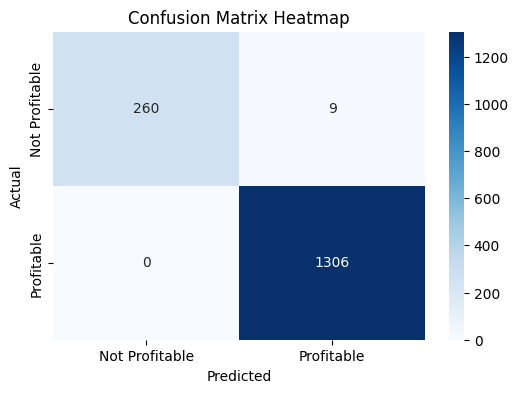

In [ ]:
# plotted heatmap of confusion matrix using seaborn for better visual understanding
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Profitable", "Profitable"], yticklabels=["Not Profitable", "Profitable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

plt.show()

# lda

In [ ]:
# Used another model Linear Discriminant Analysis to compare the results
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
report_lda = classification_report(y_test, y_pred_lda)


print("=== Linear Discriminant Analysis (LDA) ===")
print(f"Accuracy: {accuracy_lda:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lda)
print("Classification Report:")
print(report_lda)

# Our model is 96 % accurate which shows our we predicted the profit correctly

=== Linear Discriminant Analysis (LDA) ===
Accuracy: 0.9683
Confusion Matrix:
[[ 222   47]
 [   3 1303]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       269
           1       0.97      1.00      0.98      1306

    accuracy                           0.97      1575
   macro avg       0.98      0.91      0.94      1575
weighted avg       0.97      0.97      0.97      1575



# Decision Tree

In [ ]:
# Used another model called decision tree to compare the results
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# usedd gini criterion to train the model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
clf_gini.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train_scaled)

y_pred_train_gini

print('Training set score: {:.4f}'.format(clf_gini.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test_scaled, y_test)))

# Model is 100% accurate which tells we correctly predicted the profits

Training set score: 1.0000
Test set score: 1.0000


[Text(0.5, 0.75, 'x[4] <= 0.031\ngini = 0.265\nsamples = 6299\nvalue = [989.0, 5310.0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 989\nvalue = [989, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5310\nvalue = [0, 5310]'),
 Text(0.625, 0.5, '  False')]

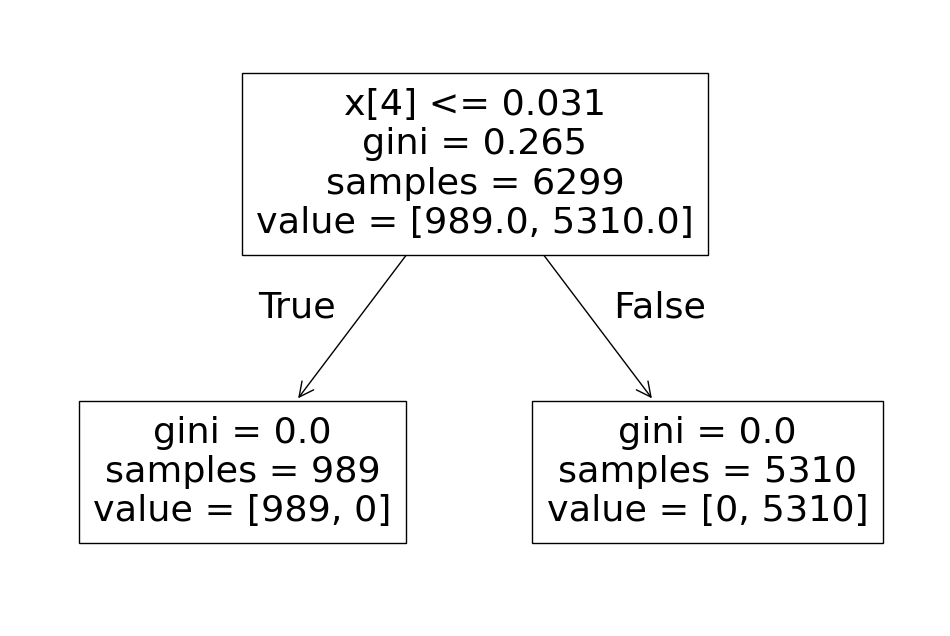

In [ ]:
# below is the decision tree visuallized
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))